# Explorace Dat

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

## Datové soubory

K dispozici jsou dva datové soubory: jeden za 2. pololetí roku 2018 a druhý za 1. pololetí roku 2019.

### Sloupce

Datová sada by měla obsahovat odečty z 43 senzorů, které jsou rozmístěny na vybraných lampách, ale v datech jsou odečty z méně senzorů (viz výstup buňky níže). Specifikace senzorů je uvedená v [katalogu datové platformy Golemio](https://golemio.cz/cs/node/622).

- `sid` (string): identifikátor stanice;
- `starttimestamp` (datetime): datum a čas měření;
- `o3` 	(integer with precision): atribut O<sub>3</sub> (ozon, ppb);
- `no2` (integer with precision): atribut NO<sub>2</sub> (oxid dusičitý, ppb);
- `so2` (integer with precision): atribut SO<sub>2</sub> (oxid siřičitý, ppb);
- `pm10` (integer with precision): atribut jemné částice PM<sub>10</sub> (µg/m<sub>3</sub>);
- `pm2p5` (integer with precision): atribut jemné částice PM<sub>2,5</sub> (µg/m<sub>3</sub>);
- `geocoordinates_latitude` (integer with precision): zeměpisná šířka stanice;
- `geocoordinates_longitude` (integer with precision): zeměpisná délka stanice.

Kde ppb znamená [parts per bilion](https://en.wikipedia.org/wiki/Parts-per_notation).

In [3]:
# 2. half of 2018 data file
data_file_2018 = 'data/636f6a2e-3a48-4801-afce-05c864adc60e-lampy_2019.csv'
# separator is ';' and parse starttimestamp as timestamp
data_2018 = pd.read_csv(data_file_2018, sep=';', parse_dates=['starttimestamp'])
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473529 entries, 0 to 473528
Data columns (total 9 columns):
starttimestamp              473529 non-null datetime64[ns, UTC]
sid                         473529 non-null object
geocoordinates_latitude     473505 non-null float64
geocoordinates_longitude    473505 non-null float64
o3                          407537 non-null float64
pm2p5                       129807 non-null float64
no2                         407537 non-null float64
so2                         407537 non-null float64
pm10                        129807 non-null float64
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 32.5+ MB


,starttimestamp,sid,geocoordinates_latitude,geocoordinates_longitude,o3,pm2p5,no2,so2,pm10
0,2018-07-05 17:47:21+00:00,24a5mhj5yiqqhmtxzvsztbwxoduhdzyd,50.091873,14.447915,39.5,NaN,44.5,173.6,NaN
1,2018-07-05 17:47:21+00:00,y7e4onsytkb3ydonflz5kcbcigkh5ulo,50.090250,14.447628,52.1,2.3,51.4,201.2,18.1
2,2018-07-05 17:47:21+00:00,gpsyhw66bubn7g7tfyjjp3equjodqo33,50.092378,14.446496,41.9,NaN,44.6,210.0,NaN
3,2018-07-05 17:37:18+00:00,24a5mhj5yiqqhmtxzvsztbwxoduhdzyd,50.091873,14.447915,45.0,NaN,38.9,177.5,NaN
4,2018-07-05 17:37:18+00:00,gpsyhw66bubn7g7tfyjjp3equjodqo33,50.092378,14.446496,40.9,NaN,43.5,222.1,NaN


In [4]:
# 1. half of 2019 data file
data_file_2019 = 'data/2e6bbd16-8d1c-4efa-b0f0-06a74f40d8d3-lampysensory-2019-1pololeti.csv'
# standard CSV file and parse starttimestamp as timestamp
data_2019 = pd.read_csv(data_file_2019, parse_dates=['starttimestamp'])
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226672 entries, 0 to 226671
Data columns (total 9 columns):
starttimestamp              226672 non-null datetime64[ns, UTC]
sid                         226672 non-null object
geocoordinates_latitude     226672 non-null float64
geocoordinates_longitude    226672 non-null float64
o3                          196871 non-null float64
pm2p5                       62518 non-null float64
no2                         196871 non-null float64
so2                         196871 non-null float64
pm10                        62518 non-null float64
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 15.6+ MB


,starttimestamp,sid,geocoordinates_latitude,geocoordinates_longitude,o3,pm2p5,no2,so2,pm10
0,2019-01-01 00:08:11+00:00,6aivodbkkk3xlwbjlkerclrnk4gtfy3x,50.092196,14.449379,3.7,NaN,22.1,14.0,NaN
1,2019-01-01 00:08:11+00:00,6czebgzn24hwd3vpklvuphomcfcwpqgx,50.091231,14.449178,6.3,0.60,10.0,28.8,10.20
2,2019-01-01 00:38:06+00:00,bxjhuifodo6nf7bnstd55g3mzw6wfv7c,50.090858,14.448525,NaN,0.46,NaN,NaN,12.32
3,2019-01-01 00:38:11+00:00,24a5mhj5yiqqhmtxzvsztbwxoduhdzyd,50.091873,14.447915,4.9,NaN,10.3,26.5,NaN
4,2019-01-01 00:38:11+00:00,oowrrh4zfxs66zdreivyrri2ribhexgc,50.093610,14.451769,6.4,NaN,20.9,15.1,NaN


In [5]:
# print data from and date to
print('2018 data from', data_2018['starttimestamp'].min(), 'to', data_2018['starttimestamp'].max())
print('2019 data from', data_2019['starttimestamp'].min(), 'to', data_2019['starttimestamp'].max())

2018 data from 2018-07-05 04:55:08+00:00 to 2018-12-31 23:58:11+00:00
2019 data from 2019-01-01 00:03:06+00:00 to 2019-04-04 15:33:12+00:00


### Trénovací a testovací data

Protože dat z roku 2018 je zhruba 71% a dat z roku 2018 je zhruba 28% je to ideální rozdělení na trénovací, respektive trénovací data.

In [6]:
n_data_2018 = data_2018.shape[0]
n_data_2019 = data_2019.shape[0]
n_data = n_data_2018 + n_data_2019
print('total rows:\t{}\t({}%)'.format(n_data, 100))
print('2018 rows:\t{}\t({:.3}%)'.format(n_data_2018, 100 * n_data_2018 / n_data))
print('2019 rows:\t{}\t({:.3}%)'.format(n_data_2019, 100 * n_data_2019 / n_data))

total rows:	700201	(100%)
2018 rows:	473529	(67.6%)
2019 rows:	226672	(32.4%)


### Spojení dat

In [7]:
# concatenate 
data = pd.concat([data_2018, data_2019], ignore_index=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700201 entries, 0 to 700200
Data columns (total 9 columns):
starttimestamp              700201 non-null datetime64[ns, UTC]
sid                         700201 non-null object
geocoordinates_latitude     700177 non-null float64
geocoordinates_longitude    700177 non-null float64
o3                          604408 non-null float64
pm2p5                       192325 non-null float64
no2                         604408 non-null float64
so2                         604408 non-null float64
pm10                        192325 non-null float64
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 48.1+ MB


,starttimestamp,sid,geocoordinates_latitude,geocoordinates_longitude,o3,pm2p5,no2,so2,pm10
0,2018-07-05 17:47:21+00:00,24a5mhj5yiqqhmtxzvsztbwxoduhdzyd,50.091873,14.447915,39.5,NaN,44.5,173.6,NaN
1,2018-07-05 17:47:21+00:00,y7e4onsytkb3ydonflz5kcbcigkh5ulo,50.090250,14.447628,52.1,2.3,51.4,201.2,18.1
2,2018-07-05 17:47:21+00:00,gpsyhw66bubn7g7tfyjjp3equjodqo33,50.092378,14.446496,41.9,NaN,44.6,210.0,NaN
3,2018-07-05 17:37:18+00:00,24a5mhj5yiqqhmtxzvsztbwxoduhdzyd,50.091873,14.447915,45.0,NaN,38.9,177.5,NaN
4,2018-07-05 17:37:18+00:00,gpsyhw66bubn7g7tfyjjp3equjodqo33,50.092378,14.446496,40.9,NaN,43.5,222.1,NaN


## Počty měření

In [8]:
# get unique sids
sids = data['sid'].unique()
print('number of sensors:', len(sids))
# show counts of measurements for each sid
data['sid'].value_counts()

number of sensors: 22


gzd4jnxvzvdm3q2nhtewfb25qunwe3ms    48248
f2z7p5o27g7d5ng3sg5nm4in5fv2at43    48116
y7e4onsytkb3ydonflz5kcbcigkh5ulo    45581
24a5mhj5yiqqhmtxzvsztbwxoduhdzyd    40213
gmsde47o7arohyx7ilfndw2y6ifyj2gg    38820
heql54pdiq6xb6j74qdpnlovm77jaify    38111
k4uu4xll34f3d6qn6lckuzhi3ionkgal    37781
6czebgzn24hwd3vpklvuphomcfcwpqgx    37239
i4jrd6zwb3qmv5hfmavywnrenzb3ipqo    34316
oowrrh4zfxs66zdreivyrri2ribhexgc    34283
gpsyhw66bubn7g7tfyjjp3equjodqo33    33708
l6ghiptksoafuk75mar6sv5jtsbtozr3    27523
6aivodbkkk3xlwbjlkerclrnk4gtfy3x    27205
xct4lqv4q3ht3a7peubhfnyyhbsnno7g    27159
bf3dpp6hsxxwpvtfei5wqo5r436krhg7    26924
xk57xngph3akjuplsqxsa3smmprg2wlo    26718
xpbhzacww6rqcqomuyfplf6pnf7dgjto    26616
dcvt6qx44it3zey2d2fg7eq2pfhupwvj    25610
bxjhuifodo6nf7bnstd55g3mzw6wfv7c    24979
gdyaoaed7gnarg6kqk2o6bmsjrw6wlk5    19256
krd5ekdvqh2xdbnd2c2ycjunifyshoto    18330
m347lkh7js6c5kvq56rttedzc6qq3qqt    13465
Name: sid, dtype: int64

In [9]:
# show number of measurement of each attribute
counts = data.set_index('sid').notna().groupby('sid').sum().astype(np.int)
counts

,starttimestamp,geocoordinates_latitude,geocoordinates_longitude,o3,pm2p5,no2,so2,pm10
sid,,,,,,,,
24a5mhj5yiqqhmtxzvsztbwxoduhdzyd,40213,40213,40213,40213,0,40213,40213,0
6aivodbkkk3xlwbjlkerclrnk4gtfy3x,27205,27205,27205,27205,0,27205,27205,0
6czebgzn24hwd3vpklvuphomcfcwpqgx,37239,37239,37239,37239,37239,37239,37239,37239
bf3dpp6hsxxwpvtfei5wqo5r436krhg7,26924,26924,26924,26924,0,26924,26924,0
bxjhuifodo6nf7bnstd55g3mzw6wfv7c,24979,24979,24979,0,24979,0,0,24979
dcvt6qx44it3zey2d2fg7eq2pfhupwvj,25610,25610,25610,25610,0,25610,25610,0
f2z7p5o27g7d5ng3sg5nm4in5fv2at43,48116,48110,48110,48116,0,48116,48116,0
gdyaoaed7gnarg6kqk2o6bmsjrw6wlk5,19256,19256,19256,19057,19256,19057,19057,19256
gmsde47o7arohyx7ilfndw2y6ifyj2gg,38820,38820,38820,0,0,0,0,0


## Vizualizace

In [10]:
a_sid = 'y7e4onsytkb3ydonflz5kcbcigkh5ulo'
columns = ['o3', 'pm2p5', 'no2', 'so2', 'pm10']
a_data = data.set_index(['sid', 'starttimestamp']).sort_index().loc[a_sid, columns]
a_data.head()

,o3,pm2p5,no2,so2,pm10
starttimestamp,,,,,
2018-07-05 11:52:18+00:00,45.9,3.30,35.3,23.3,20.87
2018-07-05 12:06:18+00:00,45.9,3.30,35.3,23.3,20.87
2018-07-05 12:17:22+00:00,45.3,3.30,42.7,14.3,19.00
2018-07-05 12:22:18+00:00,45.3,3.33,40.2,24.7,18.77
2018-07-05 12:37:43+00:00,45.3,3.33,40.2,24.7,18.77


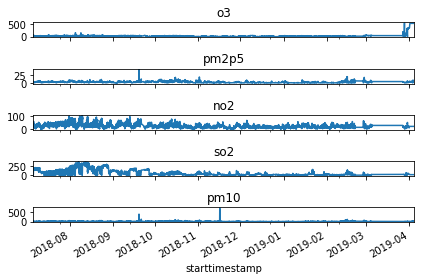

In [11]:
fig, axs = plt.subplots(nrows=len(columns), sharex=True)
for ax, column in zip(axs, columns):
    a_data[column].plot(ax=ax)
    ax.set_title(column)
fig.tight_layout()

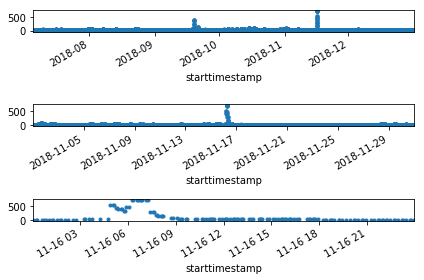

In [12]:
dates = ('2018', '2018-11', '2018-11-16')
fig, axs = plt.subplots(nrows=len(dates))
for ax, date in zip(axs, dates):
    a_data.loc[date, 'pm10'].plot(ax=ax, style='.')
fig.tight_layout()

## Rozdíl času odečtů

In [13]:
delta = pd.Series(a_data.index[1:] - a_data.index[:-1])
delta.mean(), delta.std()

(Timedelta('0 days 00:08:37.767639'), Timedelta('0 days 00:18:42.462095'))

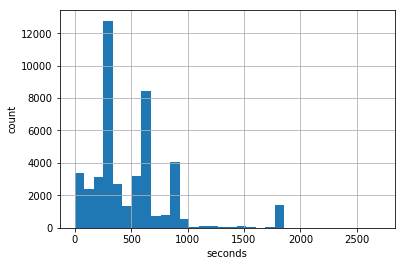

In [14]:
index = delta < delta.mean() + 2 * delta.std()
delta[index].dt.total_seconds().hist(bins=32)
plt.xlabel('seconds')
plt.ylabel('count');